<a href="https://colab.research.google.com/github/maxvell07/TelecomLabs/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проведем импорт необходимых библиотек и файлов.

In [114]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Spectrum, Wave, Noise
from thinkdsp import decorate, read_wave, unbias, normalize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Упражнение 4.1**

На сайте Soft Murmur можно послушать множество природных источников шума, включая дождь, волны, ветер и др. На веб-странице [http://asoftmurmur.com/about/](http://asoftmurmur.com/about/) приведен перечень записей; большинство из них хранится на [http://freesound.org](http://freesound.org).

Скачайте некоторые из этих файлов и вычислите спектры каждого сигнала. Похож ли их спектр мощности на белый, розовый или броуновский шум? Как спектр меняется во времени?


К сожалению, на предложенном сайте звуки либо весят больше 25мб, что не позволяет их загрузить на гитхаб, либо имеют формат не .wav, что не позволяет их обрабоать, а все подходящие звуки представляют собой сборник звуков, а хотелось разных звуков. Поэтому я просто нашёл на freesound.org похожие звуки природы, которые подходили под мои нужды.

In [115]:
if not os.path.exists('509174__guidofm__sound-of-water-stream.wav'):
  !wget https://github.com/maxvell07/TelecomLabs/raw/main/509174__guidofm__sound-of-water-stream.wav

if not os.path.exists('637344__kyles__campfire-fire-small.wav'):
  !wget https://github.com/maxvell07/TelecomLabs/raw/main/637344__kyles__campfire-fire-small.wav

if not os.path.exists('712017__audiopapkin__thunder.wav'):
  !wget https://github.com/maxvell07/TelecomLabs/raw/main/712017__audiopapkin__thunder.wav

In [116]:
stream_segment = read_wave('509174__guidofm__sound-of-water-stream.wav').segment(start=2.0, duration=1.0)
stream_segment.make_audio()

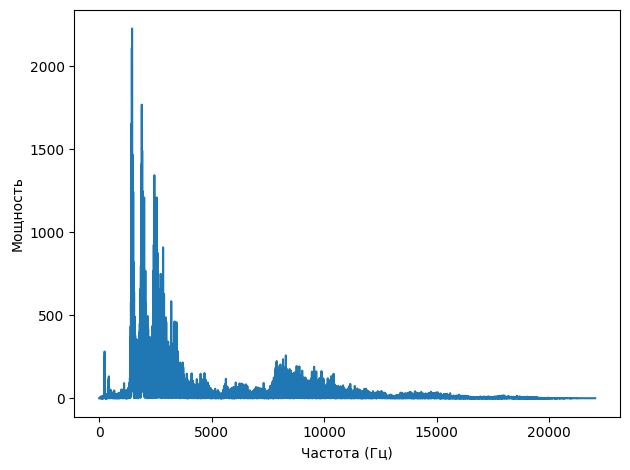

In [117]:
stream_spectrum = stream_segment.make_spectrum()
stream_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

По графику видно, что амплитуда падает с увеличением частоты, что означает, что это красный или розовый шум. Чтобы понять более конкретно, необходимо распечатать спектр мощности в логарифмической шкале:

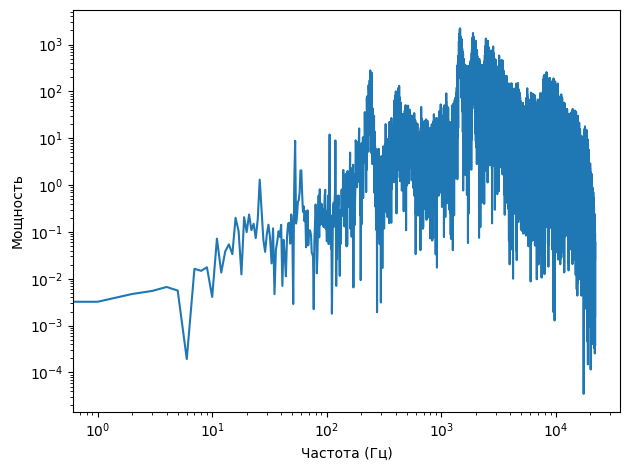

In [118]:
stream_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [119]:
stream_spectrum.estimate_slope().slope

-0.8818561162956229

Глядя на данный график сложно сказать, к какому шуму можно отнести данный шум, поскольку к частоте $10^2$ наблюдается рост мощности, а потом довольно резкий спад. Ближе всего график к розвому шуму. Попробуем взглянуть на другую часть этого звука, взяв другой сегмент.

In [120]:
stream_segment2 = read_wave('509174__guidofm__sound-of-water-stream.wav').segment(start=6.0, duration=1.0)
stream_segment2.make_audio()

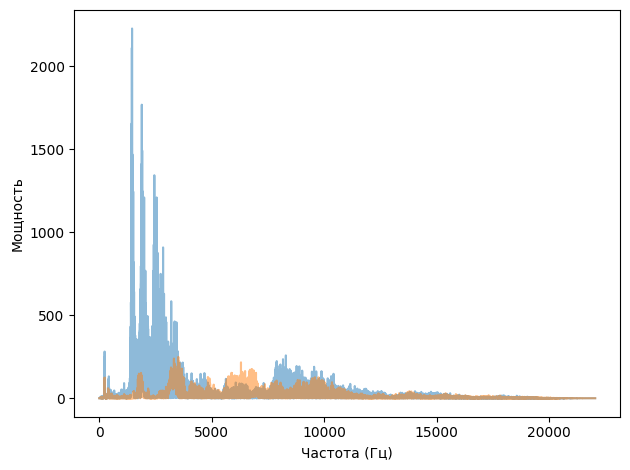

In [121]:
stream_spectrum2 = stream_segment2.make_spectrum()
stream_spectrum.plot_power(alpha=0.5)
stream_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

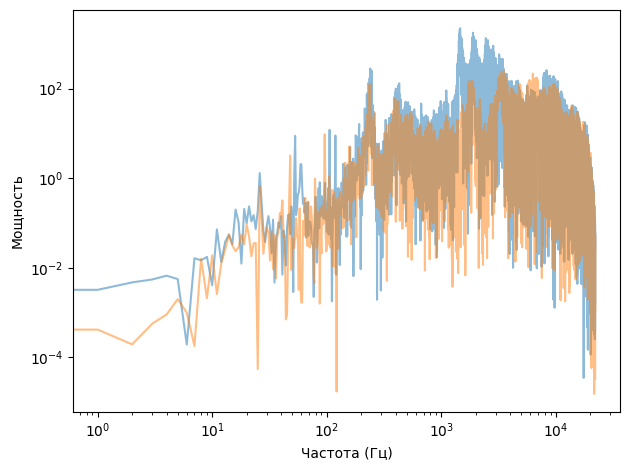

In [122]:
stream_spectrum.plot_power(alpha=0.5)
stream_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [123]:
stream_spectrum2.estimate_slope().slope

-0.5093659370243252

Как мы можем заметить, структура спектра не притерпивает сильных изменений.

Теперь рассмотрим звук радио. Сразу будем рассматривать 2 сегмента звука, чтобы иметь более полное представление и сразу в логарифмическом формате. Но перед этим обязательно послучаем эти 2 сегмента:

In [125]:
thunder_segment = read_wave('712017__audiopapkin__thunder.wav').segment(start=2.0, duration=1.0)
thunder_segment.make_audio()

In [126]:
thunder_segment2 = read_wave('712017__audiopapkin__thunder.wav').segment(start=6.0, duration=1.0)
thunder_segment2.make_audio()

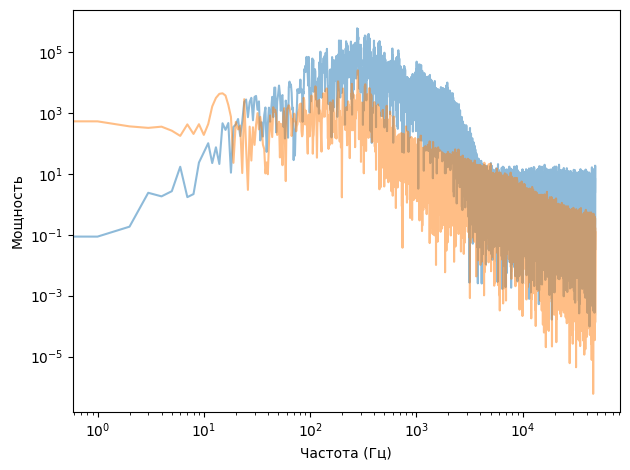

In [127]:
thunder_spectrum = thunder_segment.make_spectrum()
thunder_spectrum2 = thunder_segment2.make_spectrum()
thunder_spectrum.plot_power(alpha=0.5)
thunder_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [128]:
thunder_spectrum.estimate_slope().slope

-1.4709372290044067

In [129]:
thunder_spectrum2.estimate_slope().slope

-1.7177807837274028

Судя по графику, можно с большой вероятностью сказать, что это белый шум, но ближе к розовому.

Наконец, перейдём к последнему звуку - звуку костра:

In [130]:
fire_segment = read_wave('637344__kyles__campfire-fire-small.wav').segment(start=2.0, duration=1.0)
fire_segment.make_audio()

In [131]:
fire_segment2 = read_wave('637344__kyles__campfire-fire-small.wav').segment(start=6.0, duration=1.0)
fire_segment2.make_audio()

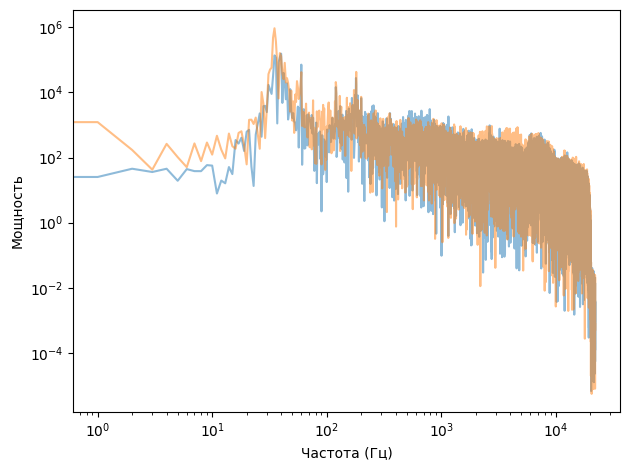

In [132]:
fire_spectrum = fire_segment.make_spectrum()
fire_spectrum2 = fire_segment2.make_spectrum()
fire_spectrum.plot_power(alpha=0.5)
fire_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [133]:
fire_spectrum.estimate_slope().slope

-1.7708329667718963

In [134]:
fire_spectrum2.estimate_slope().slope

-1.8481640628687142

В данном случае также сложно понять, к какому шуму ближе этот график. Всю середину он очень напоминает красный шум, но начало и конец графика полностью противоречат этому. Спектр также не меняется в обоих сегментах.

# **Упражнение 4.2**

В шумовом сигнале частотный состав меняется во времени. На большом интервале мощность на всех частотах одинакова, а на коротком мощность на каждой частоте случайна.

Для оценки долговременной средней мощности на каждой частоте можно разорвать сигнал на сегменты, вычислить спектр мощности для каждого сегмента, а затем найти среднее по сегментам.

Реализуйте метод Бартлетта и используйте его для оценки спектра мощности шумового сигнала. Подсказка: посмотрите на реализацию `make_spectrogram`.

Код метода Бартлетта представлен ниже

In [135]:
def bartlett_method(wave, seg_length=512, win_flag=True):
  spectrum = wave.make_spectrogram(seg_length, win_flag)
  segments = spectrum.spec_map.values()

  power_segments = []
  for segment in segments:
    power_segments.append(segment.power)

  hs = np.sqrt(sum(power_segments)/len(power_segments))
  fs = next(iter(segments)).fs

  spectrum = Spectrum(hs, fs, wave.framerate)
  return spectrum

Исследуем работу алгоритма на используемых выше сегментах.

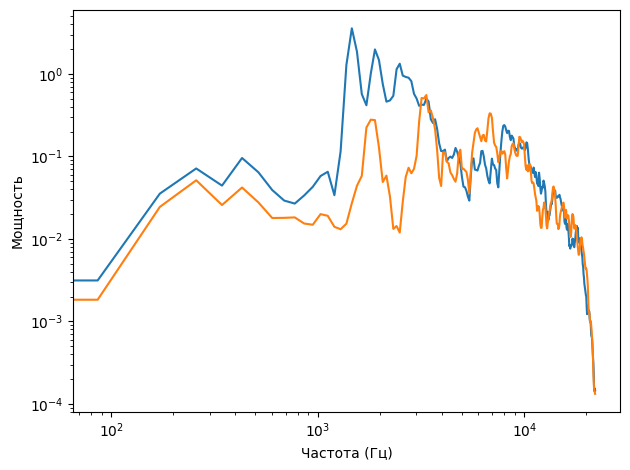

In [136]:
stream_res = bartlett_method(stream_segment)
stream_res2 = bartlett_method(stream_segment2)

thunder_res = bartlett_method(thunder_segment)
thunder_res2 = bartlett_method(thunder_segment2)

fire_res = bartlett_method(fire_segment)
fire_res2 = bartlett_method(fire_segment2)

stream_res.plot_power()
stream_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

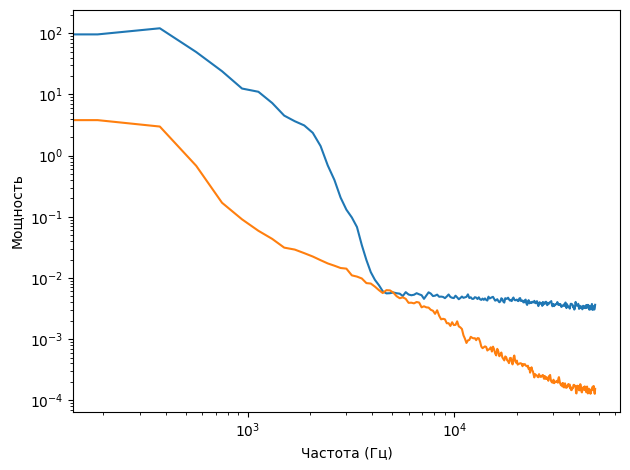

In [137]:
thunder_res.plot_power()
thunder_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

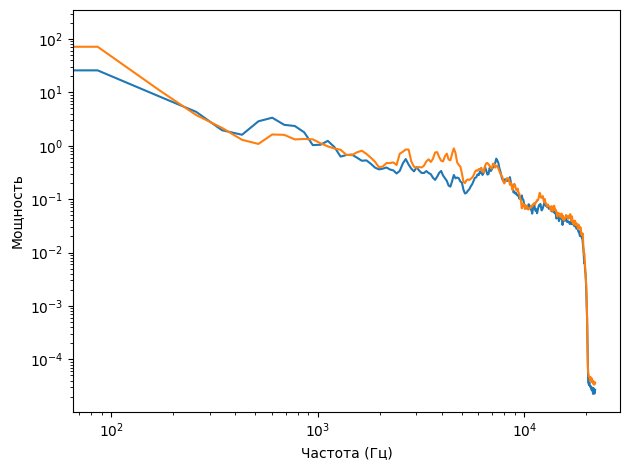

In [139]:
fire_res.plot_power()
fire_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

С помощью данного метод мы можем наглядно видеть зависимость между частотами и мощностью.

На основе новых графиков можно заметить, что предположение о том, что звук грома - белый или розовый шум, неверно, они имеют более сложную структуру, может даже ближе к красному, поэтому однозначно точно сказать нельзя. Звук ручья остаётся очень сложным к определению, а звук костра - ещё более неклассифицируемым.

# **Упражнение 4.3**

На веб-странице [http://www.coindesk.com/price](http://www.coindesk.com/price) можно скачать в ввиде CSV-файла исторические данные о ежедневной цене BitCoin. Откройте этот файл и вычислите спектр цен BitCoin как функцию времени. Похоже ли это на белый, розовый или броуновский шум?

In [140]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
  !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

Были загружены данные за 2013-2020 года

In [142]:
col_names = ["Closing Price (USD)", "Timestamp"]
data = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', parse_dates=[0])
data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


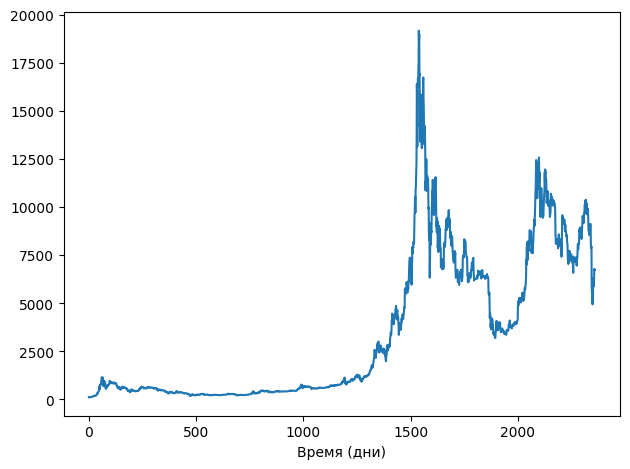

In [143]:
btc_wave = Wave(data['Closing Price (USD)'], data.index, framerate = 1)
btc_wave.plot()
decorate(xlabel='Время (дни)')

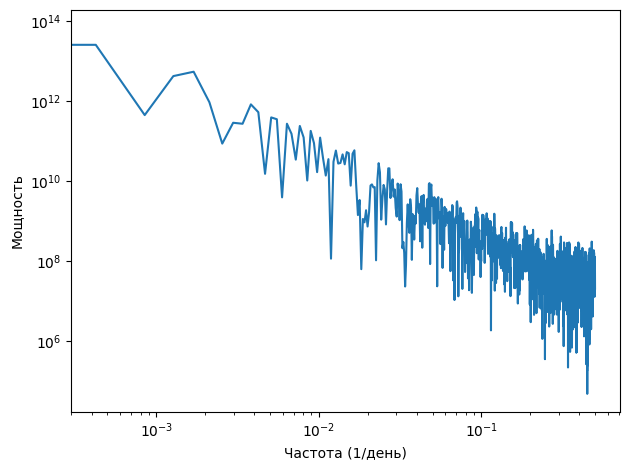

In [144]:
btc_spectrum = btc_wave.make_spectrum()
btc_spectrum.plot_power()
decorate(xlabel='Частота (1/день)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [145]:
btc_spectrum.estimate_slope().slope

-1.7332540936758951

Имеем наклон примерно -1.73. Это близко к Броуновскому шуму.

# **Упражнение 4.4**

Счетчик Гейгера - прибор для обнаружения радиации. Когда ионизирующи частицы попадают в детектор, на его выходе появляются импульсы тока. Общий выход в определенный момент времени можно смоделировать некоррелированным пуассоновым шумом (UP), где каждая выборка есть случайное число из распределения Пуассона, соответствующее количеству частиц, обнаруженных за интервал измерения.

Напишите класс, называемый `UncorrelatedPoissonNoise`, наследующий `thinkdsp._Noise` и предоставляющий `evaluate`. Следует использовать `Np.random.poisson` для генерации случайный величин из распределения Пуассона. Параметр этой функции `lam` - это среднее число частиц за время каждого интервала. Можно использовать атрибут `amp` для определения `lam`. Например, при чатоте кадров 10 кГц и `amp` 0,001 получится около 10 "щелчков" в секунду.

Сгенерируйте пару секунд UP и прослушайте. Для малых значений *amp*, например 0,001, звук будет как у счетчика Гейгера. При больших значениях он будет похож на белый шум. Вычислите и напечатайте спектр мощности и посмотрите, так ли это.


In [100]:
class UncorrelatedPoissonNoise(Noise):

  def evaluate(self, ts):
    ys = np.random.poisson(self.amp, len(ts))
    return ys

Как и предлагается в задании, сгенерируем данный шум для малых и больших значениях `amp` и посмотрим, сопоставимы ли звуки с ожидаемыми.

In [146]:
like_geiger_signal = UncorrelatedPoissonNoise(amp=0.001)
like_geiger_wave = like_geiger_signal.make_wave(duration=2.0, framerate=10000)
like_white_noise_signal = UncorrelatedPoissonNoise(amp=1)
like_white_noise_wave = like_white_noise_signal.make_wave(duration=2.0, framerate=10000)

like_geiger_wave.make_audio()

In [102]:
like_white_noise_wave.make_audio()

Если прослушать звуки, то в первом случае услышим что-то похоже на трещание счётчика Гейгера, а во втором только шум.

Сравним графики и спектры сигналов:

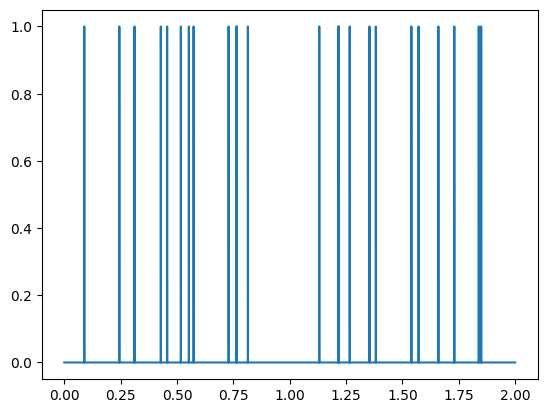

In [147]:
like_geiger_wave.plot()

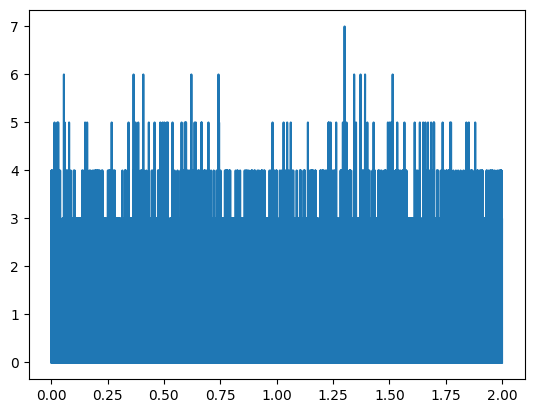

In [104]:
like_white_noise_wave.plot()

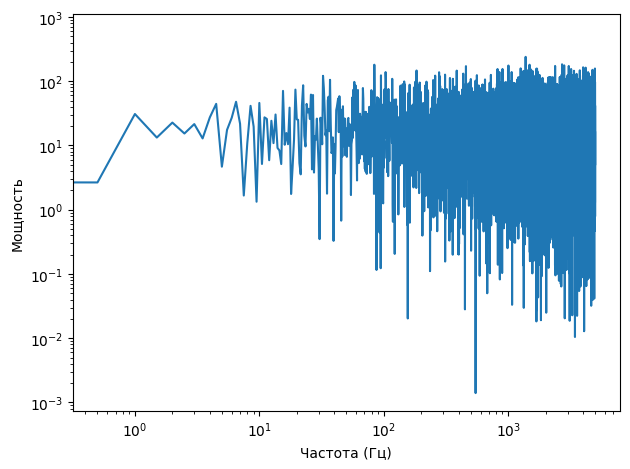

In [148]:
like_geiger_spectrum = like_geiger_wave.make_spectrum()
like_geiger_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [149]:
like_geiger_spectrum.estimate_slope().slope

-0.006136231555646979

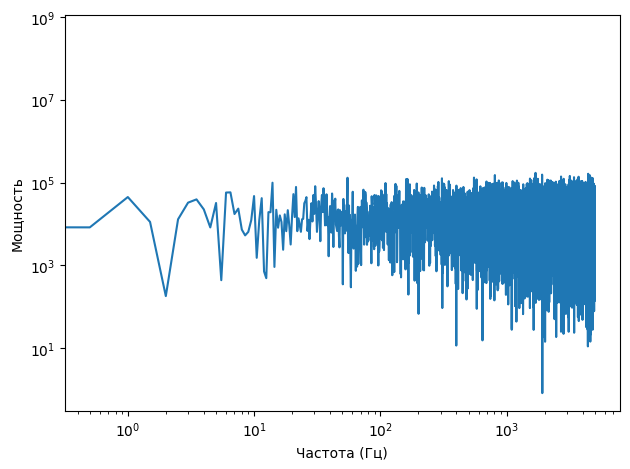

In [150]:
like_white_noise_spectrum = like_white_noise_wave.make_spectrum()
like_white_noise_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [151]:
like_white_noise_spectrum.estimate_slope().slope

-0.011745222220528104

Как мы видим из полученных данных оба сигнала имеют уклон ~0, в связи с чем их можно считать белым шумом.

# **Упражнение 4.5**

В этой главе алгоритм для генерации розового шума концептуально простой, но затратный. Существет более эффективные варианты, например алгоритм *Voss-McCartney*. Изучите этот способ, реализуйте его, вычислите спектр результата и убедитесь, что соотношения между мощностью и частотой соответсвующие.


In [152]:
def voss_pink_noise(rows, columns=16):
  array = np.empty((rows, columns))
  array.fill(np.nan)
  array[0, :] = np.random.random(columns)
  array[:, 0] = np.random.random(rows)

  cols = np.random.geometric(0.5, rows)
  cols[cols >= columns] = 0
  new_rows = np.random.randint(rows, size=rows)
  array[new_rows, cols] = np.random.random(rows)

  data = pd.DataFrame(array)
  data.fillna(method='ffill', axis=0, inplace=True)
  total = data.sum(axis=1)

  return total.values

Проверим его на примере с 12000 значениями

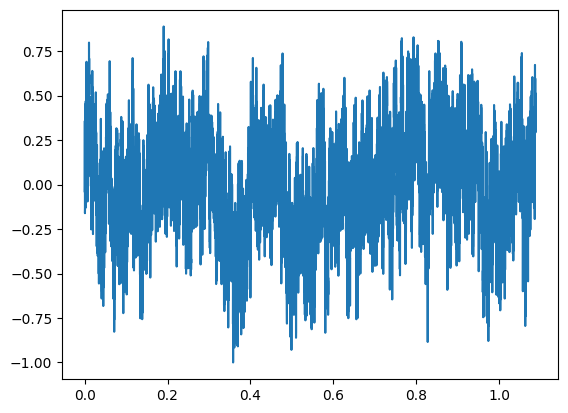

In [153]:
ys = voss_pink_noise(12000)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()

In [154]:
wave.make_audio()

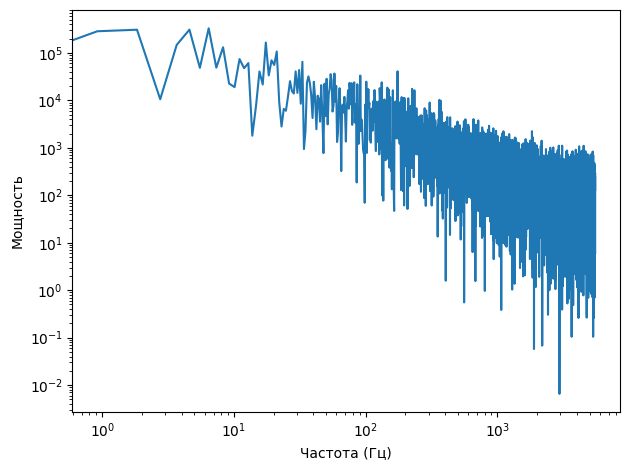

In [155]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [156]:
spectrum.estimate_slope().slope

-1.0139661356176186

Как мы видим уклон равен -1, а это значит, что действительно получился розовый шум.